In [62]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import time 
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
sb.set_theme(style="darkgrid")
matplotlib.rcParams['figure.dpi'] = 300

In [63]:
df = pd.read_excel(io='Data_4.xlsx')
df

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1,1,1,103,0,harpy.co
1,1,1,2,0,2,harpy.co
2,1,1,3,0,4,harpy.co
3,1,1,4,0,5,harpy.co
4,1,1,5,0,13,harpy.co
...,...,...,...,...,...,...
2695,100,5,5,109,0,westeros.inc
2696,100,5,6,0,11,westeros.inc
2697,100,5,7,0,6,westeros.inc
2698,100,6,6,110,0,westeros.inc


*1) Разделим данные для разных поставщиков с цель посчета оценки производительности для каждого из производителей, на основании которой и будет дан ответ на посавленный вопрос.*

In [64]:
df_harpy = df[df['supplier'] == 'harpy.co']
df_westeros = df[df['supplier'] == 'westeros.inc']

С целью определения более надежного поставщика предлагаю рассмотреть следующие статистики и характеристики:

1.   доля сломанных мечей каждого производителя 
2.   ежемесячная доля сломанных мечей для каждого из производителей относительно месяца поломки (данная оценка будет более репрезентативна, поскольку учтет сезонные влияния на продукт)
3.   ежемесячная доля сломанных мечей для каждого из производителей относительно месяца производства 

In [65]:
portion_defect_harpy = df_harpy.defects.sum()/df_harpy.produced.sum()
portion_defect_westeros = df_westeros.defects.sum()/df_westeros.produced.sum()
print("Доля дефектных мечей для harpy: ", portion_defect_harpy)
print("Доля дефектных мечей для westeros: ", portion_defect_westeros)

Доля дефектных мечей для harpy:  0.19281999238868452
Доля дефектных мечей для westeros:  0.2614387351778656


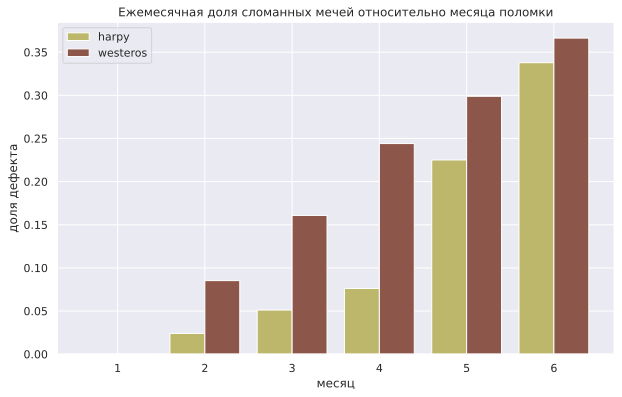

In [80]:
df_harpy_month = df_harpy[['report.date', 'produced', 'defects']].groupby(['report.date']).sum()
df_westeros_month = df_westeros[['report.date', 'produced', 'defects']].groupby(['report.date']).sum()
month_def_portion_H = df_harpy_month['defects'].values[df_harpy_month['produced'].values > 0]/df_harpy_month['produced'].values[df_harpy_month['produced'].values > 0]
month_def_portion_W = df_westeros_month['defects'].values[df_westeros_month['produced'].values > 0]/df_westeros_month['produced'].values[df_westeros_month['produced'].values > 0]

plt.figure(figsize=(10, 6))
x_axis = np.arange(1,len(month_def_portion_H)+1)

# Multi bar Chart
plt.bar(x_axis -0.2, month_def_portion_H, width=0.4, label = 'harpy', color = 'darkkhaki')
plt.bar(x_axis +0.2, month_def_portion_W, width=0.4, label = 'westeros', color = 'tab:brown')
# Add legend
plt.title('Ежемесячная доля сломанных мечей относительно месяца поломки')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('доля дефекта')
# Display
plt.show()

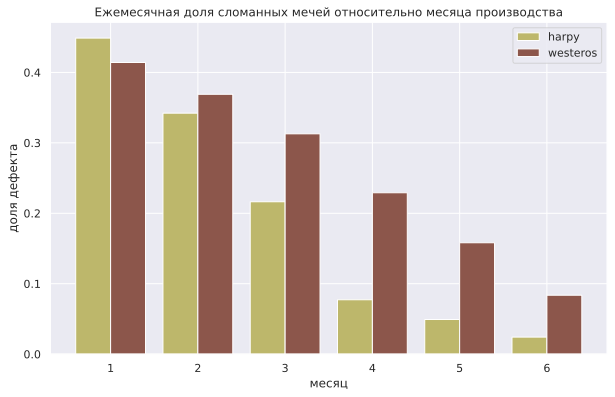

In [81]:
df_harpy_month = df_harpy[['production.date', 'produced', 'defects']].groupby(['production.date']).sum()
df_westeros_month = df_westeros[['production.date', 'produced', 'defects']].groupby(['production.date']).sum()
month_def_portion_H = df_harpy_month['defects'].values[df_harpy_month['produced'].values > 0]/df_harpy_month['produced'].values[df_harpy_month['produced'].values > 0]
month_def_portion_W = df_westeros_month['defects'].values[df_westeros_month['produced'].values > 0]/df_westeros_month['produced'].values[df_westeros_month['produced'].values > 0]

plt.figure(figsize=(10, 6))
x_axis = np.arange(1,len(month_def_portion_H)+1)

# Multi bar Chart
plt.bar(x_axis -0.2, month_def_portion_H, width=0.4, label = 'harpy', color = 'darkkhaki')
plt.bar(x_axis +0.2, month_def_portion_W, width=0.4, label = 'westeros', color = 'tab:brown')
# Add legend
plt.title('Ежемесячная доля сломанных мечей относительно месяца производства')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('доля дефекта')
# Display
plt.show()

**ВЫВОД:** Проанализировав гистограммы, можно заключить, что harpy.co - является более надежным поставщиком, поскольку ежемесячная доля брака (дефектных товаров) почти всегда меньше его конкурента, также общая доля произведенного брака меньше, чем у поставщика westeros. (~19%, против ~26%)